**PREDIKSI KELUARGA BERESIKO STUNTING**

# ***INSTALL LIBRARY***

In [1]:
!pip install autoviz
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 10.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/2

# ***IMPORT LIBRARY***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# **DATA *SELECTION***

In [3]:
#LOAD DATA
df = pd.read_csv('/content/datasetbrst.csv')

In [4]:
df.head(10)

,sumber air minum buruk,sanitasi buruk,terlalu muda istri,terlalu tua istri,terlalu dekat umur,terlalu banyak anak,beresiko stunting
0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0,0
5,0.0,0.0,0.0,0.0,0.0,0,0
6,0.0,0.0,0.0,0.0,0.0,0,0
7,0.0,0.0,0.0,1.0,0.0,1,1
8,0.0,0.0,0.0,1.0,0.0,0,1
9,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7517 entries, 0 to 7516
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sumber air minum buruk  7514 non-null   float64
 1   sanitasi buruk          7514 non-null   float64
 2   terlalu muda istri      6728 non-null   float64
 3   terlalu tua istri       6730 non-null   float64
 4   terlalu dekat umur      6725 non-null   float64
 5   terlalu banyak anak     6731 non-null   object 
 6   beresiko stunting       6732 non-null   object 
dtypes: float64(5), object(2)
memory usage: 411.2+ KB


In [6]:
pd.concat([df.head(6), df.tail(4)])

,sumber air minum buruk,sanitasi buruk,terlalu muda istri,terlalu tua istri,terlalu dekat umur,terlalu banyak anak,beresiko stunting
0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0,0
5,0.0,0.0,0.0,0.0,0.0,0,0
7513,0.0,1.0,0.0,0.0,0.0,0,1
7514,0.0,1.0,0.0,0.0,0.0,0,1
7515,0.0,1.0,0.0,0.0,0.0,0,1
7516,0.0,1.0,0.0,0.0,0.0,0,1


# ***PREPROCESSING* DATA**

In [7]:
#MENGHITUNG MISSING VALUE
df.isnull() .sum()

sumber air minum buruk      3
sanitasi buruk              3
terlalu muda istri        789
terlalu tua istri         787
terlalu dekat umur        792
terlalu banyak anak       786
beresiko stunting         785
dtype: int64

In [8]:
#MENGHAPUS MISSING VALUE
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Menampilkan DataFrame setelah penghapusan
pd.concat([df.head(5), df.tail(5)])

,sumber air minum buruk,sanitasi buruk,terlalu muda istri,terlalu tua istri,terlalu dekat umur,terlalu banyak anak,beresiko stunting
0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0,0
6704,0.0,1.0,0.0,0.0,0.0,0,1
6705,0.0,1.0,0.0,0.0,0.0,0,1
6706,0.0,1.0,0.0,0.0,0.0,0,1
6707,0.0,1.0,0.0,0.0,0.0,0,1
6708,0.0,1.0,0.0,0.0,0.0,0,1


In [9]:
#MISSING VALUE SETELAH PREPROCESSING
df.isnull() .sum()

sumber air minum buruk    0
sanitasi buruk            0
terlalu muda istri        0
terlalu tua istri         0
terlalu dekat umur        0
terlalu banyak anak       0
beresiko stunting         0
dtype: int64

In [10]:
#INFORMASI DATA SETELAH PREPROCESSING
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sumber air minum buruk  6709 non-null   float64
 1   sanitasi buruk          6709 non-null   float64
 2   terlalu muda istri      6709 non-null   float64
 3   terlalu tua istri       6709 non-null   float64
 4   terlalu dekat umur      6709 non-null   float64
 5   terlalu banyak anak     6709 non-null   object 
 6   beresiko stunting       6709 non-null   object 
dtypes: float64(5), object(2)
memory usage: 367.0+ KB


# ***TRANSFORMATION* DATA**

In [11]:
#TRANSFORMASI DATA
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   sumber air minum buruk  6709 non-null   int64
 1   sanitasi buruk          6709 non-null   int64
 2   terlalu muda istri      6709 non-null   int64
 3   terlalu tua istri       6709 non-null   int64
 4   terlalu dekat umur      6709 non-null   int64
 5   terlalu banyak anak     6709 non-null   int64
 6   beresiko stunting       6709 non-null   int64
dtypes: int64(7)
memory usage: 367.0 KB


In [12]:
# Menampilkan DataFrame setelah transformasi data
pd.concat([df.head(5), df.tail(5)])

,sumber air minum buruk,sanitasi buruk,terlalu muda istri,terlalu tua istri,terlalu dekat umur,terlalu banyak anak,beresiko stunting
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
6704,0,1,0,0,0,0,1
6705,0,1,0,0,0,0,1
6706,0,1,0,0,0,0,1
6707,0,1,0,0,0,0,1
6708,0,1,0,0,0,0,1


# **DATA MINING**

**PEMBAGIAN VARIABEL X DAN Y**

In [13]:
#MEMBAGI VARIABEL X DAN Y
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
print(x)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]]


In [15]:
print (y)

[0 0 0 ... 1 1 1]


**DATA TRAINING & DATA TESTING**

In [16]:
#MEMBAGI DATA TRAINING & DATA TESTING
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  5367
x_test =  1342
y_train =  5367
y_test =  1342


**DATA ANALISIS**

In [17]:
#ANALISIS DATA PADA KOLOM BERESIKO STUNTING
class_distribution = df['beresiko stunting'].value_counts()
print(class_distribution)

0    4681
1    2028
Name: beresiko stunting, dtype: int64


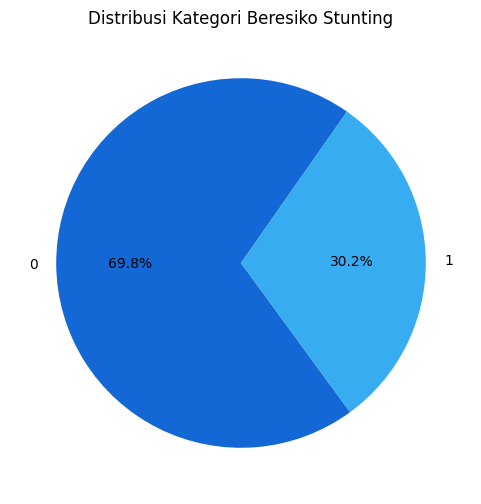

In [18]:
# Hitung frekuensi masing-masing kategori
kategori_counts = df['beresiko stunting'].value_counts()

# Data untuk pie chart
labels = kategori_counts.index
sizes = kategori_counts.values

# Warna dan eksplosi
colors = ['#1368d6','#37acf0']
explode = (1, 0)

# Membuat exploded pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', startangle=55)
plt.title('Distribusi Kategori Beresiko Stunting')
plt.show()


**METODE *OVERSAMPLING* SMOTE**

In [19]:
#Penerapan Oversampling SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)

x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

y_train_resampled_series = pd.Series(y_train_resampled)

#PERBANDINGAN DATA OVERSAMPLING
print('Before Sampling')
print(pd.Series(y_train).value_counts())
print('')
print('After Sampling')
print(y_train_resampled_series.value_counts())

Before Sampling
0    3736
1    1631
dtype: int64

After Sampling
1    3736
0    3736
dtype: int64


In [20]:
x_resampled = pd.DataFrame(x_train_resampled, columns=[f'feature_{i}' for i in range(x_train_resampled.shape[1])])
y_resampled = pd.Series(y_train_resampled, name='target')

train_data = pd.concat([x_resampled, y_resampled], axis=1)

In [21]:
#MENGECEK MISSING VALUES SETELAH OVERSAMPLING
print(pd.Series(y_train).isna().sum())

0


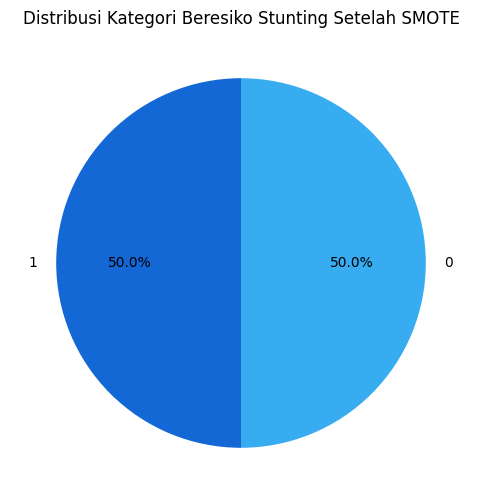

In [22]:
# Hitung frekuensi masing-masing kategori
kategori_ytrain = y_train_resampled_series.value_counts()
# Data untuk pie chart
labels = kategori_ytrain.index
sizes = kategori_ytrain.values

# Warna dan eksplosi
colors = ['#1368d6','#37acf0']
explode = (1, 0)

# Membuat exploded pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Kategori Beresiko Stunting Setelah SMOTE')
plt.show()


In [23]:
# Inisialisasi Environment PyCaret
from pycaret.classification import *
exp1 = setup(data=df, target='beresiko stunting')

,Description,Value
0,Session id,8306
1,Target,beresiko stunting
2,Target type,Binary
3,Original data shape,"(6709, 7)"
4,Transformed data shape,"(6709, 7)"
5,Transformed train set shape,"(4696, 7)"
6,Transformed test set shape,"(2013, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [24]:
# Perbandingan Model Terbaik
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9874,0.9911,0.9958,0.9641,0.9796,0.9705,0.9709,0.5820
knn,K Neighbors Classifier,0.9874,0.9897,0.9958,0.9641,0.9796,0.9705,0.9709,0.1940
nb,Naive Bayes,0.9874,0.9898,0.9958,0.9641,0.9796,0.9705,0.9709,0.0840
dt,Decision Tree Classifier,0.9874,0.9905,0.9958,0.9641,0.9796,0.9705,0.9709,0.1110
svm,SVM - Linear Kernel,0.9874,0.0000,0.9958,0.9641,0.9796,0.9705,0.9709,0.0560
rf,Random Forest Classifier,0.9874,0.9905,0.9958,0.9641,0.9796,0.9705,0.9709,0.5060
gbc,Gradient Boosting Classifier,0.9874,0.9899,0.9958,0.9641,0.9796,0.9705,0.9709,0.3100
et,Extra Trees Classifier,0.9874,0.9905,0.9958,0.9641,0.9796,0.9705,0.9709,0.4290
xgboost,Extreme Gradient Boosting,0.9874,0.9906,0.9958,0.9641,0.9796,0.9705,0.9709,0.8680
lightgbm,Light Gradient Boosting Machine,0.9874,0.9904,0.9958,0.9641,0.9796,0.9705,0.9709,0.2730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**KORELASI DATA**

<Axes: >

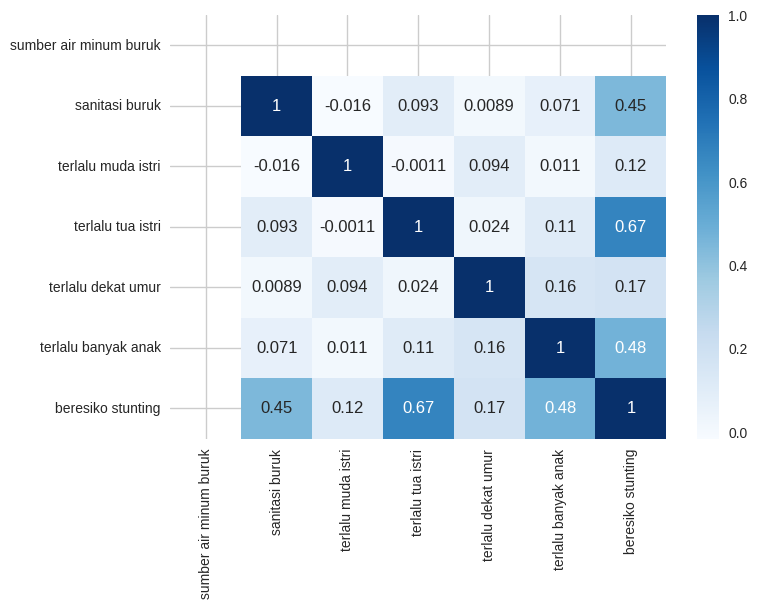

In [25]:
#KORELASI DATA
sns.heatmap(df.corr(), cmap="Blues", annot=True)

In [26]:
df.corr().style.background_gradient() .set_precision(1)

,sumber air minum buruk,sanitasi buruk,terlalu muda istri,terlalu tua istri,terlalu dekat umur,terlalu banyak anak,beresiko stunting
sumber air minum buruk,nan,nan,nan,nan,nan,nan,nan
sanitasi buruk,nan,1.0,-0.0,0.1,0.0,0.1,0.4
terlalu muda istri,nan,-0.0,1.0,-0.0,0.1,0.0,0.1
terlalu tua istri,nan,0.1,-0.0,1.0,0.0,0.1,0.7
terlalu dekat umur,nan,0.0,0.1,0.0,1.0,0.2,0.2
terlalu banyak anak,nan,0.1,0.0,0.1,0.2,1.0,0.5
beresiko stunting,nan,0.4,0.1,0.7,0.2,0.5,1.0


**PEMBUATAN MODEL NAIVE BAYES**

In [27]:
#PEMBUATAN MODEL NAIVE BAYES
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
classifier.predict_proba(x_test)

array([[9.99990257e-01, 9.74307669e-06],
       [9.99990257e-01, 9.74307669e-06],
       [9.99990257e-01, 9.74307669e-06],
       ...,
       [9.99990257e-01, 9.74307669e-06],
       [9.99990257e-01, 9.74307669e-06],
       [9.99990257e-01, 9.74307669e-06]])

# **EVALUASI MODEL**

In [30]:
#AKURASI MODEL
akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       945
           1       0.96      0.99      0.98       397

    accuracy                           0.99      1342
   macro avg       0.98      0.99      0.98      1342
weighted avg       0.99      0.99      0.99      1342



In [31]:
#AKURASI DALAM BENTUK PERSEN
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi : %d" %(akurasi*100), "%")

Tingkat Akurasi : 98 %


In [32]:
# Membuat DataFrame untuk menampilkan perbandingan y_test dan y_pred
result_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
print(result_df)

      y_test  y_pred
0          0       0
1          0       0
2          0       0
3          0       0
4          1       1
...      ...     ...
1337       0       0
1338       0       0
1339       0       0
1340       0       0
1341       0       0

[1342 rows x 2 columns]


In [33]:
#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[927  18]
 [  2 395]]


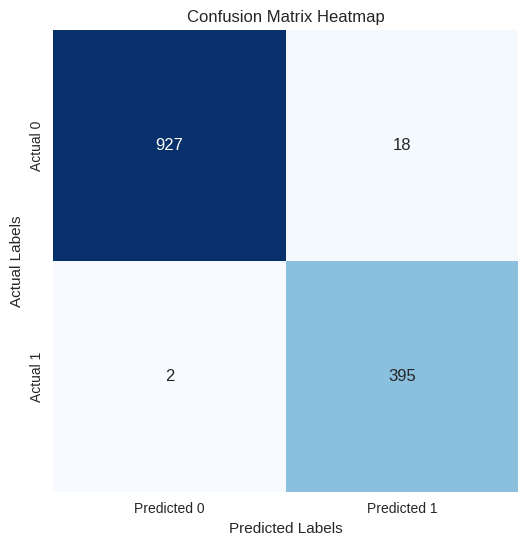

In [34]:
# Visualisasi confusion matrix
cm = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')

plt.show()

# **EXPORT MODEL**

In [35]:
#MENYIMPAN MODEL
import pickle
model = 'kbst_model.sav'
pickle.dump(classifier, open(model, 'wb'))